<font size="6">Predicting successfulness of a terroristic attack</font>

**A. Dementyev**

---

Hello!

I created this notebook for analysing terroristic attacks from 1970 until 2019. The dataset is available in a following website: https://www.start.umd.edu/gtd/ 

The **goal** of the research is to predict successfulness of an attack: ***whether it will be successful or not***.


<img src="http://www.quickmeme.com/img/45/4547755c16e559dfddad6f7a725e499f9ac9169e0f2683db0b1f805c48943723.jpg" style="width: 500px;" align="center"/>  
<br>
<br>
What do I mean?

According to [GTD Codebook](https://gtd.terrorismdata.com/files/gtd-codebook/), success of a terrorist strike is defined according to the tangible effects of the attack.
Success is not judged in terms of the larger goals of the perpetrators. For example, a
bomb that exploded in a building would be counted as a success even if it did not
succeed in bringing the building down or inducing government repression.  
The definition of a successful attack depends on the type of attack. Essentially, the
key question is whether or not the attack type took place. If a case has multiple
attack types, it is successful if any of the attack types are successful, with the
exception of assassinations, which are only successful if the intended target is killed.

     1 = "Yes" The incident was successful.
     0 = "No" The incident was not successful.
     
**ASSASSINATION**  
In order for an assassination to be successful, the target of the assassination must be
killed. For example, even if an attack kills numerous people but not the target, it is
an unsuccessful assassination.  

**ARMED ASSAULT**  
An armed assault is determined to be successful if the assault takes place and if a
target is hit (including people and/or property). Unsuccessful armed assaults are
those in which the perpetrators attack and do not hit the target. An armed assault is
also unsuccessful if the perpetrators are apprehended on their way to commit the
assault. To make this determination, however, there must be information to indicate
that an actual assault was imminent.  

**BOMBING/EXPLOSION**   
A bombing is successful if the bomb or explosive device detonates. Bombings are
considered unsuccessful if they do not detonate. The success or failure of the
bombing is not based on whether it hit the intended target.  

**HIJACKING**  
A hijacking is successful if the hijackers assume control of the vehicle at any point,
whereas a hijacking is unsuccessful if the hijackers fail to assume control of the
vehicle. The success or failure of the hijacking is not based on whether the vehicle
reached the intended destination of the hijackers.

**HOSTAGE TAKING (BARRICADE INCIDENT)**  
A barricade incident is successful if the hostage takers assume control of the
individuals at any point, whereas a barricade incident is unsuccessful if the hostage
takers fail to assume control of the individuals.

**HOSTAGE TAKING (KIDNAPPING)**  
A kidnapping is successful if the kidnappers assume control of the individuals at any
point, whereas a kidnapping is unsuccessful if the kidnappers fail to assume control
of the individuals.  

**FACILITY / INFRASTRUCTURE ATTACK**  
A facility attack is determined to be successful if the facility is damaged. If the facility
has not been damaged, then the attack is unsuccessful.  

**UNARMED ASSAULT**  
An unarmed assault is determined to be successful there is a victim that who has
been injured. Unarmed assaults that are unsuccessful are those in which the
perpetrators do not injure anyone. An unarmed assault is also unsuccessful if the
perpetrators are apprehended when on their way to commit the assault. To make
this determination, however, there must be information to indicate that an assault
was imminent. 


For our research I consider using the following structure:

1. Loading Data;  


2. Preprocessing;  


3. Exploratory Data Analysis;  


4. Modelling.

Let us start with preparing our data and packages!

# Loading Data

First of all, we need to load all the appropriate packages and take a quick look at our dataset. In the following we will be using matplotlib and seaborn for plotting purposes, and scikit learn's classification library for modeling purposes.

In [1]:
# importing packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from datetime import datetime
import statistics as stat
import patsy
import plotly.offline as pyo
# Scikit-learn Classification Models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff

#LGBM Classifier
import lightgbm

# loading data and transferring mixed-type columns to strings
data = pd.read_csv("C:/Users/DLect/OneDrive/Рабочий стол/HSE/ML project/Global Terrorism Database/globalterrorismdb_0221dist.csv", dtype={'eventid': str,'approxdate': str, 'resolution': str, 31: str,33: str, 54: str,61: str,62: str,63: str,76: str,79: str,90: str,92: str,94:str,96: str,114: str,115: str,121: str})

print ('The dataset has', data.shape[0], 'terror attacks with', data.shape[1], 'different features')

display(data.head())

The dataset has 201183 terror attacks with 135 different features


eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

# Preprocessing Data

With a first glance we can assume that this dataset has plenty of missing values. Moreover, we don't need so much variables for our research, therefore in the future it is better to delete some columns we don't need. But we did not see names of all the columns in dataset. Let's fix it!

In [2]:
col_list = data.columns.values.tolist()
print(col_list)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

There are several columns that want to be renamed. We aren't going to rename all the columns, but only important ones.

In [3]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

display(data.head())

eventid  Year  Month  Day approxdate  extended resolution  country  \
0  197000000001  1970      7    2        NaN         0        NaN       58   
1  197000000002  1970      0    0        NaN         0        NaN      130   
2  197001000001  1970      1    0        NaN         0        NaN      160   
3  197001000002  1970      1    0        NaN         0        NaN       78   
4  197001000003  1970      1    0        NaN         0        NaN      101   

              Country  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

That's better. Now, we have to look what columns have the biggest number of missing values.

In [4]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_data.head(61))

Total    Percent
gsubname3         201160  99.988568
weapsubtype4      201113  99.965206
weapsubtype4_txt  201113  99.965206
weaptype4         201110  99.963715
weaptype4_txt     201110  99.963715
...                  ...        ...
weapsubtype2      187800  93.347847
weapsubtype2_txt  187800  93.347847
weaptype2         185903  92.404925
weaptype2_txt     185903  92.404925
nhostkidus        185475  92.192183

[61 rows x 2 columns]

We have almost 60 columns, where there are more than 93% of missing values. It's better to delete these columns. In our opinion, we can't loose any important data because there are so few rows, so ones can't represent anything useful.

In [5]:
data1 = data.copy()

nan_limit = 93

data1_deleted = data1.loc[:, (data1.isnull().sum()*100/data1.isnull().count() >= nan_limit)]
col_list1 = data1_deleted.columns.values.tolist()

data1 = data1.loc[:, (data1.isnull().sum()*100 /
                      data1.isnull().count() <= nan_limit)]
colnum = data1.shape[1]

print('The next columns have been deleted:')
print(col_list1)
print('---------')
print(f'There are {colnum} columns left')
print('---------')
print(f'TOP-50 columns with missing values:')
total = data1.isnull().sum().sort_values(ascending=False)
percent = (data1.isnull().sum()*100/data1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_data.head(50))

The next columns have been deleted:
['approxdate', 'resolution', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'guncertain2', 'guncertain3', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased']
---------
There are 77 columns left
---------
TOP-50 columns with missing values:


Total    Percent
weaptype2         185903  92.404925
weaptype2_txt     185903  92.404925
nhostkidus        185475  92.192183
nhostkid          185420  92.164845
claimmode         177745  88.349910
claimmode_txt     177745  88.349910
related           172269  85.628010
alternative       168064  83.537873
alternative_txt   168064  83.537873
addnotes          167736  83.374838
propvalue         155768  77.426025
scite3            151153  75.132094
Motive            147554  73.343175
location          137414  68.302988
propcomment       136722  67.959022
propextent_txt    130685  64.958272
propextent        130685  64.958272
ransom            121622  60.453418
scite2            113109  56.221947
weapdetail         81023  40.273284
nperps             71095  35.338473
nwoundte           70511  35.048190
nperpcap           69474  34.532739
nkillter           67867  33.733964
scite1             66183  32.896915
Summary            66121  32.866097
claimed            66094  32.852676
nwoundus           64696  32.157787
nkillus            64437  32.029048
corp1              42539  21.144431
weapsubtype1_txt   24175  12.016423
weapsubtype1       24175  12.016423
Wounded            18924   9.406361
Killed             11950   5.939866
targsubtype1       11454   5.693324
targsubtype1_txt   11454   5.693324
longitude           4628   2.300393
latitude            4627   2.299896
natlty1             1850   0.919561
natlty1_txt         1850   0.919561
Target               635   0.315633
city                 426   0.211748
guncertain1          380   0.188883
ishostkid            178   0.088477
specificity            1   0.000497
Region                 0   0.000000
vicinity               0   0.000000
INT_LOG                0   0.000000
INT_IDEO               0   0.000000
INT_MISC               0   0.000000

Let's describe remaining variables in order to understand the way of filling missing data.

In [6]:
pd.set_option('display.max_columns', 100)
data1.describe()

Year          Month            Day       extended  \
count  201183.000000  201183.000000  201183.000000  201183.000000   
mean     2004.158478       6.451678      15.520983       0.049915   
std        13.429481       3.387376       8.808477       0.217769   
min      1970.000000       0.000000       0.000000       0.000000   
25%      1992.000000       4.000000       8.000000       0.000000   
50%      2011.000000       6.000000      15.000000       0.000000   
75%      2015.000000       9.000000      23.000000       0.000000   
max      2019.000000      12.000000      31.000000       1.000000   

             country         region       latitude      longitude  \
count  201183.000000  201183.000000  196556.000000  196555.000000   
mean      131.448398       7.253600      23.356215      29.784881   
std       111.919230       2.914629      18.224189      56.602962   
min         4.000000       1.000000     -53.154613    -176.176447   
25%        75.000000       6.000000      11.506724       8.644191   
50%       101.000000       8.000000      31.250196      43.659053   
75%       160.000000      10.000000      34.558524      68.810806   
max      1004.000000      12.000000      74.633553     179.366667   

         specificity       vicinity          crit1          crit2  \
count  201182.000000  201183.000000  201183.000000  201183.000000   
mean        1.465409       0.068376       0.988409       0.993081   
std         0.988601       0.281706       0.107038       0.082893   
min         1.000000      -9.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       1.000000   
50%         1.000000       0.000000       1.000000       1.000000   
75%         1.000000       0.000000       1.000000       1.000000   
max         5.000000       1.000000       1.000000       1.000000   

               crit3      doubtterr   alternative       multiple  \
count  201183.000000  201183.000000  33119.000000  201183.000000   
mean        0.869984      -0.452106      1.294333       0.143695   
std         0.336322       2.347402      0.725400       0.350781   
min         0.000000      -9.000000      1.000000       0.000000   
25%         1.000000       0.000000      1.000000       0.000000   
50%         1.000000       0.000000      1.000000       0.000000   
75%         1.000000       0.000000      1.000000       0.000000   
max         1.000000       1.000000      5.000000       1.000000   

             success        suicide    attacktype1      targtype1  \
count  201183.000000  201183.000000  201183.000000  201183.000000   
mean        0.885144       0.036131       3.314947       8.476362   
std         0.318848       0.186617       1.989192       6.620949   
min         0.000000       0.000000       1.000000       1.000000   
25%         1.000000       0.000000       2.000000       3.000000   
50%         1.000000       0.000000       3.000000       4.000000   
75%         1.000000       0.000000       3.000000      14.000000   
max         1.000000       1.000000       9.000000      22.000000   

        targsubtype1        natlty1    guncertain1     individual  \
count  189729.000000  199333.000000  200803.000000  201183.000000   
mean       47.121146     127.811351       0.077110       0.003569   
std        30.729765      90.788348       0.266767       0.059634   
min         1.000000       4.000000       0.000000       0.000000   
25%        22.000000      83.000000       0.000000       0.000000   
50%        35.000000     104.000000       0.000000       0.000000   
75%        74.000000     179.000000       0.000000       0.000000   
max       113.000000    1004.000000       1.000000       1.000000   

              nperps       nperpcap        claimed     claimmode  \
count  130088.000000  131709.000000  135089.000000  23438.000000   
mean      -67.711172      -1.390786       0.074758      7.070697   
std       200.530257      12.308944       1.024954      2.364093   
min       -99.000000 

It's especially beneficial to look at the distribution of variables **Wounded** and **Killed**. If it has somewhat like normal distribution, we can replace it with mean value. If we met great outliers, probably, the median will be better.

Median Killed = 0.0
Median Wounded = 3.0


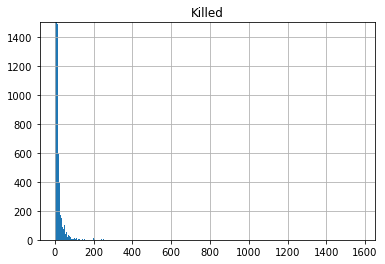

<AxesSubplot:>

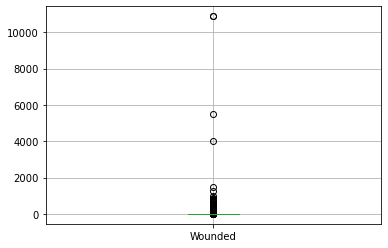

In [7]:
%matplotlib inline

median_killed = stat.median(data1['Killed'])
median_wounded = stat.median(data1['Wounded'])
print(f'Median Killed = {median_killed}')
print(f'Median Wounded = {median_wounded}')
data1.hist('Killed', bins = 800)
plt.ylim([0, 1500])
plt.show()
data1.boxplot('Wounded')

It looks like both variables are highly right-skewed, so there is definitely no need to replace them with mean. More appropriate for this case is to use robust statistics, i.e. **median**. Let's do it.

In [8]:
data1.Killed = np.round(data1.Killed.fillna(data1.Killed.median())).astype(int) 
data1.Wounded = np.round(data1.Wounded.fillna(data1.Wounded.median())).astype(int)

check_null_killed = data1['Killed'].isnull().sum()
check_null_wounded = data1['Wounded'].isnull().sum()

print(f'N/A in Killed = {check_null_killed}')
print(f'N/A in Wounded = {check_null_wounded}')

N/A in Killed = 0
N/A in Wounded = 0


As we saw previously, column **specificity** has only one missing value. Obviously, we drop this row, as it changes nothing.

In [9]:
data1 = data1.dropna(axis = 0, subset = ['specificity'])
check_null_spec = data1['specificity'].isnull().sum()
print(f'N/A in specificity = {check_null_spec}')

N/A in specificity = 0


Then, let's retrieve columns with N/A and check for correlation between them. If correlation is higher than 0.5, we should drop these columns.

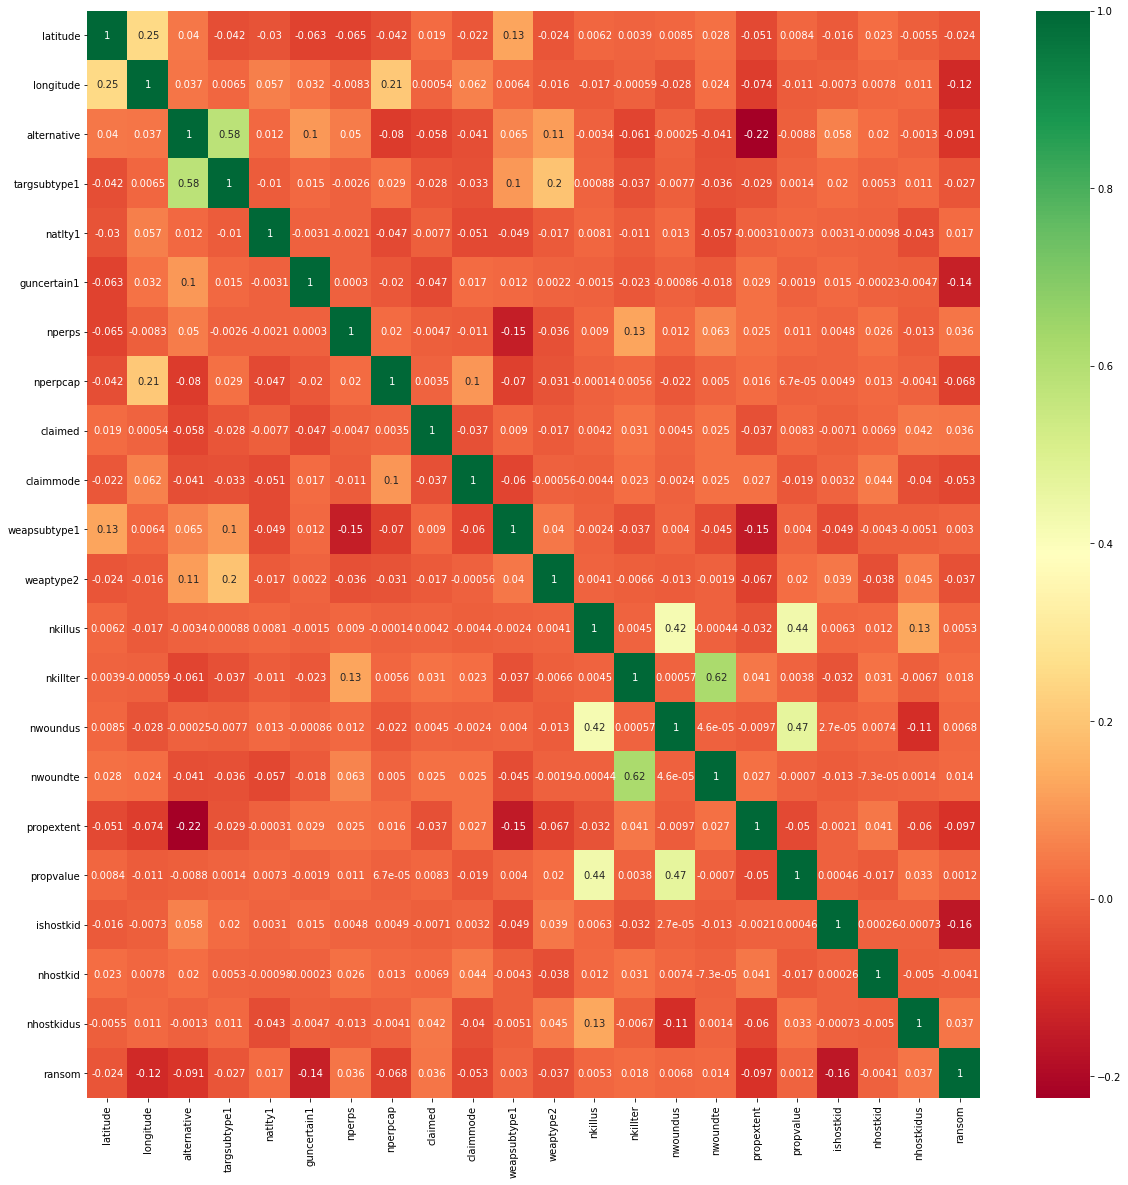

In [10]:
#retrieving columns with n/a
data1_cols_with_na = data1.loc[:, (data1.isnull().sum()*100 /
                      data1.isnull().count() > 0)]

#preparing correlation matrix
corrmat = data1_cols_with_na.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
hm = sns.heatmap(data1_cols_with_na.corr(), cbar=True, annot=True, cmap="RdYlGn")

Interesting, but there are only two pairs of these columns: **nkillter** - **nwoundte** and **alternative** - **targsubtype1**. The first pair means how many perpetrators were killed or injured. But this doesn't help us with predicting successfulness of terroristic act because it is about consequences, not causes. So, it's better to remove both columns. As for the second pair, we want to delete **alternative** because we are not interested in other possible reason than terrorism.

In [11]:
data1 = data1.drop(columns = ['nkillter', 'nwoundte', 'alternative', 'alternative_txt'])
data1.shape[1]

73

Let's delete columns **weaptype2** and **weaptype2_txt** because ones represent the second type of weapon, which shouldn't affect the accuracy of our prediction. Also, we have to delete columns **addnotes**, **scite1**, **scite2**, **scite3**, **location**, **propcomment**, **propvalue**, **weapdetail**, **nperpcap**, **Summary**, **corp1**, **longtitude**, **latitude**, **city**, **nhostkidus**, **nhostkid**, **claimmode_txt**, **propextent_txt**, **nperps**. It's because these variables provide unnecessary details, or too vague or described in other variable, or useless itself.

In [12]:
data1 = data1.drop(columns=['weaptype2', 'weaptype2_txt', 'addnotes', 'scite1', 'scite2', 'scite3', 'location', 'propcomment',
                            'propvalue', 'weapdetail', 'nperpcap', 'Summary', 'corp1', 'longitude', 'latitude', 'city', 'nhostkidus', 'nhostkid', 'claimmode_txt', 'propextent_txt', 'nperps'])
data1.shape[1]

52

Next, we replace the unknown values in columns **vicinity**, **claimed**, **property**, **guncertain1** and **ishostkid** with zeros. **claimmode** could be replaced with 10 because it means 'unknown' in the codebook. **propextent**, **ransom**, **weapsubtype1_txt**, **weapsubtype1**, **targsubtype1_txt**, **targsubtype1** could be replaced with 4, -9, 'No corresponding', 0, 'No corresponding', 0 accordingly due to the same reason.

In [13]:
data1.loc[:,['vicinity', 'claimed', 'property', 'ishostkid']] = data1.loc[:,['vicinity', 'claimed', 'property', 'ishostkid']].replace(-9,0)

# replacing some strange values in claimed
data1.claimed.replace(2,1, inplace = True)

data1.guncertain1.fillna(0, inplace = True)
data1.ishostkid.fillna(0, inplace = True)
data1.claimmode.fillna(10, inplace = True)
data1.propextent.fillna(4, inplace = True)
data1.weapsubtype1_txt.fillna('No corresponding', inplace = True)
data1.weapsubtype1.fillna(0, inplace = True)
data1.targsubtype1_txt.fillna('No corresponding', inplace = True)
data1.targsubtype1.fillna(0, inplace = True)
data1.ransom.fillna(-9, inplace = True)

**related** column is better to be renamed as **is_related** and presented as binary variable, where it should have two values: 1 - attack has related incidents, 0 - no related incidents. Also, we should replace columns **nwoundus** and **nkillus** with categorical variables. This variables should have 4 levels:  

* 0 - no us citizens killed/wounded
* 1 - from 1 - 10 of us citizens are killed/wounded
* 2 - from 10 - 100 of us citizens are killed/wounded
* 3 - more than 100 us citizens are killed/wounded

These columns will have names **woundus_extent** and **killus_extent**.

In [14]:
data1 = data1.rename(columns = {'related':'is_related', 'nwoundus':'woundus_extent', 'nkillus':'killus_extent'})

In [15]:
data1.is_related.replace('.*$', 1, inplace = True,regex=True)
data1.is_related.fillna(0, inplace = True)

data1.woundus_extent.fillna(0, inplace = True)
data1.loc[((data1.woundus_extent <=10) & (data1.woundus_extent>0)),'woundus_extent']=1
data1.loc[((data1.woundus_extent <=100) & (data1.woundus_extent>10)),'woundus_extent']=2
data1.loc[(data1.woundus_extent > 100),'woundus_extent']=3

data1.killus_extent.fillna(0, inplace = True)
data1.loc[((data1.killus_extent <=10) & (data1.killus_extent>0)),'killus_extent']=1
data1.loc[((data1.killus_extent <=100) & (data1.killus_extent>10)),'killus_extent']=2
data1.loc[(data1.killus_extent > 100),'killus_extent']=3

In [16]:
total = data1.isnull().sum().sort_values(ascending=False)
percent = (data1.isnull().sum()*100/data1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
display(missing_data.head())

Total    Percent
Motive       147554  73.343540
claimed       66094  32.852840
natlty1        1850   0.919565
natlty1_txt    1850   0.919565
Target          635   0.315635

Now, we need to fill NaNs in the rest 5 columns. For **claimed** and **natlty1** zero is the best option, while for **Motive**, **Target** and **natlty1_txt** 'Unknown' is better. 

In [17]:
data1.claimed.fillna(0, inplace = True)
data1.natlty1.fillna(0, inplace = True)
data1.Motive.fillna('Unknown', inplace = True)
data1.Target.fillna('Unknown', inplace = True)
data1.natlty1_txt.fillna('Unknown', inplace = True)

# Exploratory Data Analysis

Here comes a fun part. We are going to explore the terrorist events around the world and their successfulness by making plots and geomaps. 

First of all, we want to figure out how proportion of successful terroristic attacks was changing during 1970-2019.

In [18]:
pyo.init_notebook_mode()

sapy = data1[data1['success']==1].groupby('Year', as_index=False)['success'].count()
overall_sapy = data1.groupby('Year', as_index=False)['success'].count().rename(columns = {'Year':'Year', 'success':'overall'})
overall_sapy = pd.concat([sapy, overall_sapy['overall']], axis = 1)
overall_sapy['prop_sapy'] = round(overall_sapy['success']/overall_sapy['overall'],3)

trace = go.Scatter(x = overall_sapy.Year, y = overall_sapy.prop_sapy,
                   name = 'percent of successful attacks', line = dict(color = 'red', width = 4, dash ='dot'),
                   hoverinfo = 'x+y+name')

layout = go.Layout(title = 'Proportion of successful attacks per Year', template = 'plotly_white')

py.iplot(dict(data = [trace], layout = layout))

Hmm... In 2010s terrorists were loosing their power, but we can conclude that more than 79% of terroristic attacks WERE successful during the whole 49-year period.

Let's check what countries suffered the most from successful attacks. Note, we don't consider countries with attacks less than 1000.

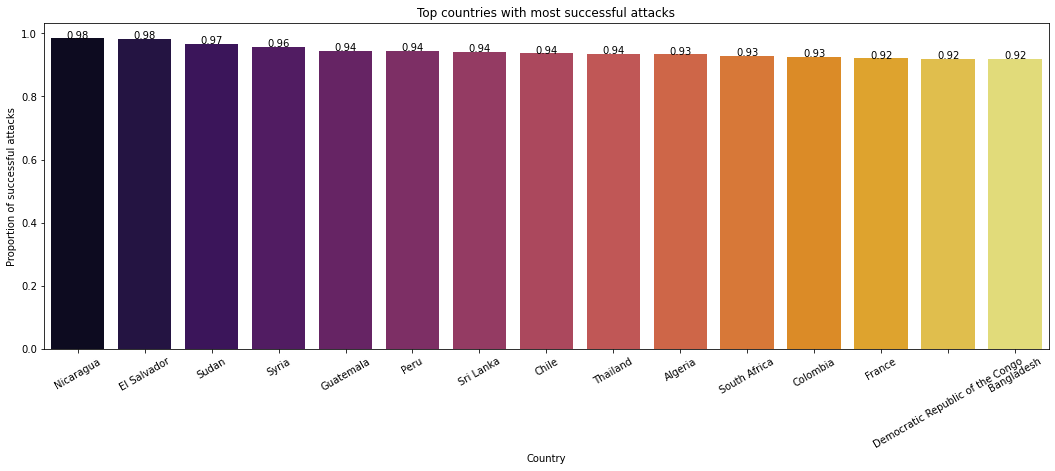

In [19]:
plt.subplots(figsize=(18,6))

# creating table with proportions

csa = data1[data1['success']==1].groupby('Country', as_index=False)['success'].count().sort_values('success', ascending = False)
csa_ov = data1.groupby('Country', as_index=False)['success'].count().rename(columns = {'Country':'Country', 'success':'overall'}).sort_values('overall', ascending = False)
csa_ov = pd.merge(csa,csa_ov,on='Country')
csa_ov['Proportion of successful attacks'] = round(csa_ov['success']/csa_ov['overall'],3)
csa_ov = csa_ov.sort_values('Proportion of successful attacks', ascending = False)
csa_ov = csa_ov.loc[(csa_ov['overall'] >= 1000), :]

# defining function for showing values on bars in barplot

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# plotting

g = sns.barplot(x = csa_ov.Country[:15], y = csa_ov['Proportion of successful attacks'][:15],palette='inferno')
plt.title('Top countries with most successful attacks')
show_values_on_bars(g)
plt.xticks(rotation=30)
plt.show(g)

It would be interesting to take a look at successfulness of attacks by region.

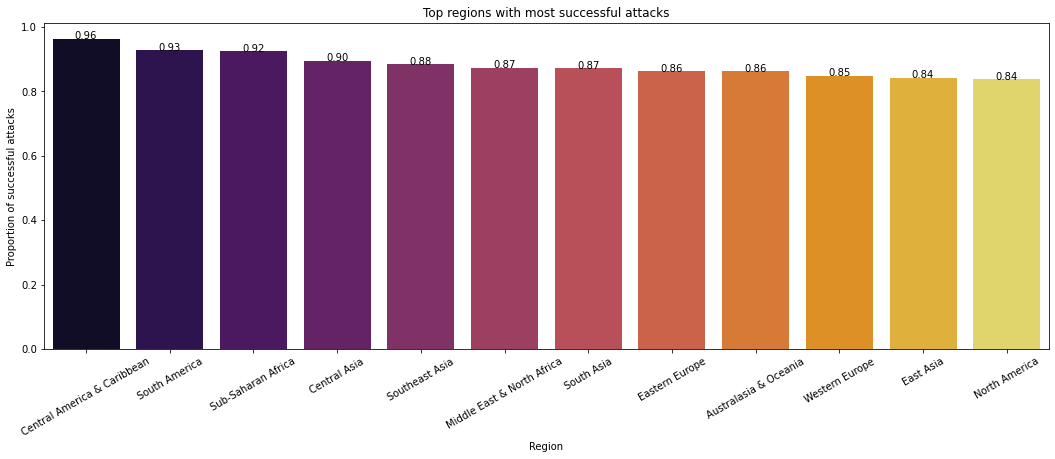

In [20]:
plt.subplots(figsize=(18,6))

# creating table with proportions

csa = data1[data1['success']==1].groupby('Region', as_index=False)['success'].count().sort_values('success', ascending = False)
csa_ov = data1.groupby('Region', as_index=False)['success'].count().rename(columns = {'Region':'Region', 'success':'overall'}).sort_values('overall', ascending = False)
csa_ov = pd.merge(csa,csa_ov,on='Region')
csa_ov['Proportion of successful attacks'] = round(csa_ov['success']/csa_ov['overall'],3)
csa_ov = csa_ov.sort_values('Proportion of successful attacks', ascending = False)

# plotting

g = sns.barplot(x = csa_ov.Region, y = csa_ov['Proportion of successful attacks'],palette='inferno')
plt.title('Top regions with most successful attacks')
show_values_on_bars(g)
plt.xticks(rotation=30)
plt.show(g)

As we assumed, most successful attacks were identified in Central and South America, as well as in Sub-Saharan Africa and least successful ones were in Europe, East Asia and North America. A bit of surprise was seeing Middle East and North Africa not in TOP-4 list of 'easiest-for-terrorists' regions.

Finally, it would be interesting to know what attacking method is the most effective.

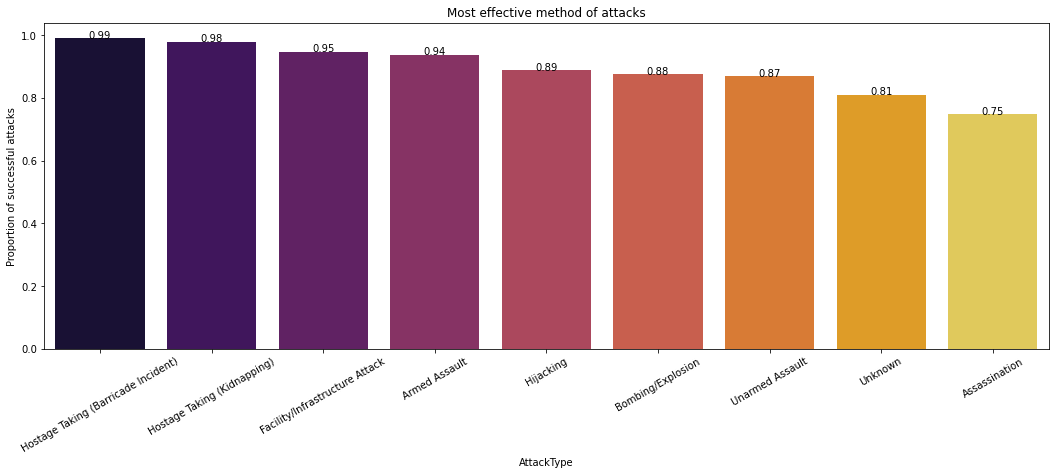

In [21]:
plt.subplots(figsize=(18,6))

# creating table with proportions

csa = data1[data1['success']==1].groupby('AttackType', as_index=False)['success'].count().sort_values('success', ascending = False)
csa_ov = data1.groupby('AttackType', as_index=False)['success'].count().rename(columns = {'AttackType':'AttackType', 'success':'overall'}).sort_values('overall', ascending = False)
csa_ov = pd.merge(csa,csa_ov,on='AttackType')
csa_ov['Proportion of successful attacks'] = round(csa_ov['success']/csa_ov['overall'],3)
csa_ov = csa_ov.sort_values('Proportion of successful attacks', ascending = False)

# plotting

g = sns.barplot(x = csa_ov.AttackType, y = csa_ov['Proportion of successful attacks'],palette='inferno')
plt.title('Most effective method of attacks')
show_values_on_bars(g)
plt.xticks(rotation=30)
plt.show(g)

# Modelling

We are getting closer and closer to the final part, where we dot the i's and cross the t's in predicting successfulness of terroristic attacks. We are going to use several models, including Logistic Regression, Random Forest Classifier, SGD Classifier, SVC Classifier and AdaBoost Classifier.

But first, we need to calculate overall probability that terroristic act will be successful.

In [22]:
success_probability = data1[data1['success'] == 1]['success'].count()/data1['success'].count()

print(f'Overall probability of success = {round(success_probability,3)}')

Overall probability of success = 0.885


It means that when we naively say that terroristic act will be successful, we can guess with high probability of 88%. So, probably, we don't have to use any algorithm, right?

WRONG!

This fact speaks that we have highly imbalanced dataset. Later we'll get back to this, but now let's do feature selection.

## Feature Selection

Before we start modelling, we need to find out useless features and drop them. It's necessary because it can increase speed and interpretabilty, as well as we can avoid decrease in generalization performance on a test set.

For now, let's print our dataset first.

In [23]:
data1.head()

eventid  Year  Month  Day  extended  country             Country  \
0  197000000001  1970      7    2         0       58  Dominican Republic   
1  197000000002  1970      0    0         0      130              Mexico   
2  197001000001  1970      1    0         0      160         Philippines   
3  197001000002  1970      1    0         0       78              Greece   
4  197001000003  1970      1    0         0      101               Japan   

   region                       Region provstate  specificity  vicinity  \
0       2  Central America & Caribbean  National          1.0         0   
1       1                North America   Federal          1.0         0   
2       5               Southeast Asia    Tarlac          4.0         0   
3       8               Western Europe    Attica          1.0         0   
4       4                    East Asia   Fukouka          1.0         0   

   crit1  crit2  crit3  doubtterr  multiple  success  suicide  attacktype1  \
0      1      1      1          0         0        1        0            1   
1      1      1      1          0         0        1        0            6   
2      1      1      1          0         0        1        0            1   
3      1      1      1          0         0        1        0            3   
4      1      1      1         -9         0        1        0            7   

                       AttackType  targtype1                  Target_type  \
0                   Assassination         14  Private Citizens & Property   
1     Hostage Taking (Kidnapping)          7      Government (Diplomatic)   
2                   Assassination         10          Journalists & Media   
3               Bombing/Explosion          7      Government (Diplomatic)   
4  Facility/Infrastructure Attack          7      Government (Diplomatic)   

   targsubtype1                                   targsubtype1_txt  \
0          68.0                                     Named Civilian   
1          45.0  Diplomatic Personnel (outside of embassy, cons...   
2          54.0                    Radio Journalist/Staff/Facility   
3          46.0                                  Embassy/Consulate   
4          46.0                                  Embassy/Consulate   

                    Target  natlty1         natlty1_txt  \
0             Julio Guzman     58.0  Dominican Republic   
1  Nadine Chaval, daughter     21.0             Belgium   
2                 Employee    217.0       United States   
3             U.S. Embassy    217.0       United States   
4           U.S. Consulate    217.0       United States   

                                Group   Motive  guncertain1  individual  \
0                              MANO-D  Unknown          0.0           0   
1  23rd of September Communist League  Unknown          0.0           0   
2                             Unknown  Unknown          0.0           0   
3                             Unknown  Unknown          0.0           0   
4                             Unknown  Unknown          0.0           0   

   claimed  claimmode  weaptype1 Weapon_type  weapsubtype1  \
0      0.0       10.0         13     Unknown           0.0   
1      0.0       10.0         13     Unknown           0.0   
2      0.0       10.0         13     Unknown           0.0   
3      0.0       10.0          6  Explosives          16.0   
4      0.0       10.0          8  Incendiary           0.0   

         weapsubtype1_txt  Killed  killus_extent  Wounded  woundus_extent  \
0        No corresponding       1            0.0        0             0.0   
1        No corresponding       0            0.0        0             0.0   
2        No corresponding       1            0.0        0             0.0   
3  Unknown Explosive Type       0            0.0        0             0.0   
4        No corresponding       0            0.0        0             0.0   

   property  propextent  ishostkid  ransom dbsource  INT_LOG  INT_IDEO  \
0         0         4.0        

Using our logic, we can already delete **eventid** (it is absolutely useless it terms of prediction), **Year**, **Day** (it is useful to look only at months), **Country**, **Region**, **AttackType**, **Target_type**, **targsubtype1_txt**, **natlty1_txt**, **Weapon_type**, **weapsubtype1_txt** (because they describe variables, which are already present in data, so we can't loose important data), **dbsource** (database source has absolutely no affect on successfulness), **Motive** (it is a bit described in **targtype1**, **targsubtype1** and provides too much details) and **Target** (it provides unnecessary details, which are already described in **targsubtype1**).

In [24]:
data2 = data1.copy()

data2 = data2.drop(columns=['eventid', 'Year', 'Day', 'Country', 'Region', 'AttackType',
                            'Target_type', 'targsubtype1_txt', 'natlty1_txt', 'Weapon_type', 'weapsubtype1_txt', 'Target', 'dbsource', 'Motive'])

data2.shape

(201182, 38)

Then, we want to look if there are collinear features.

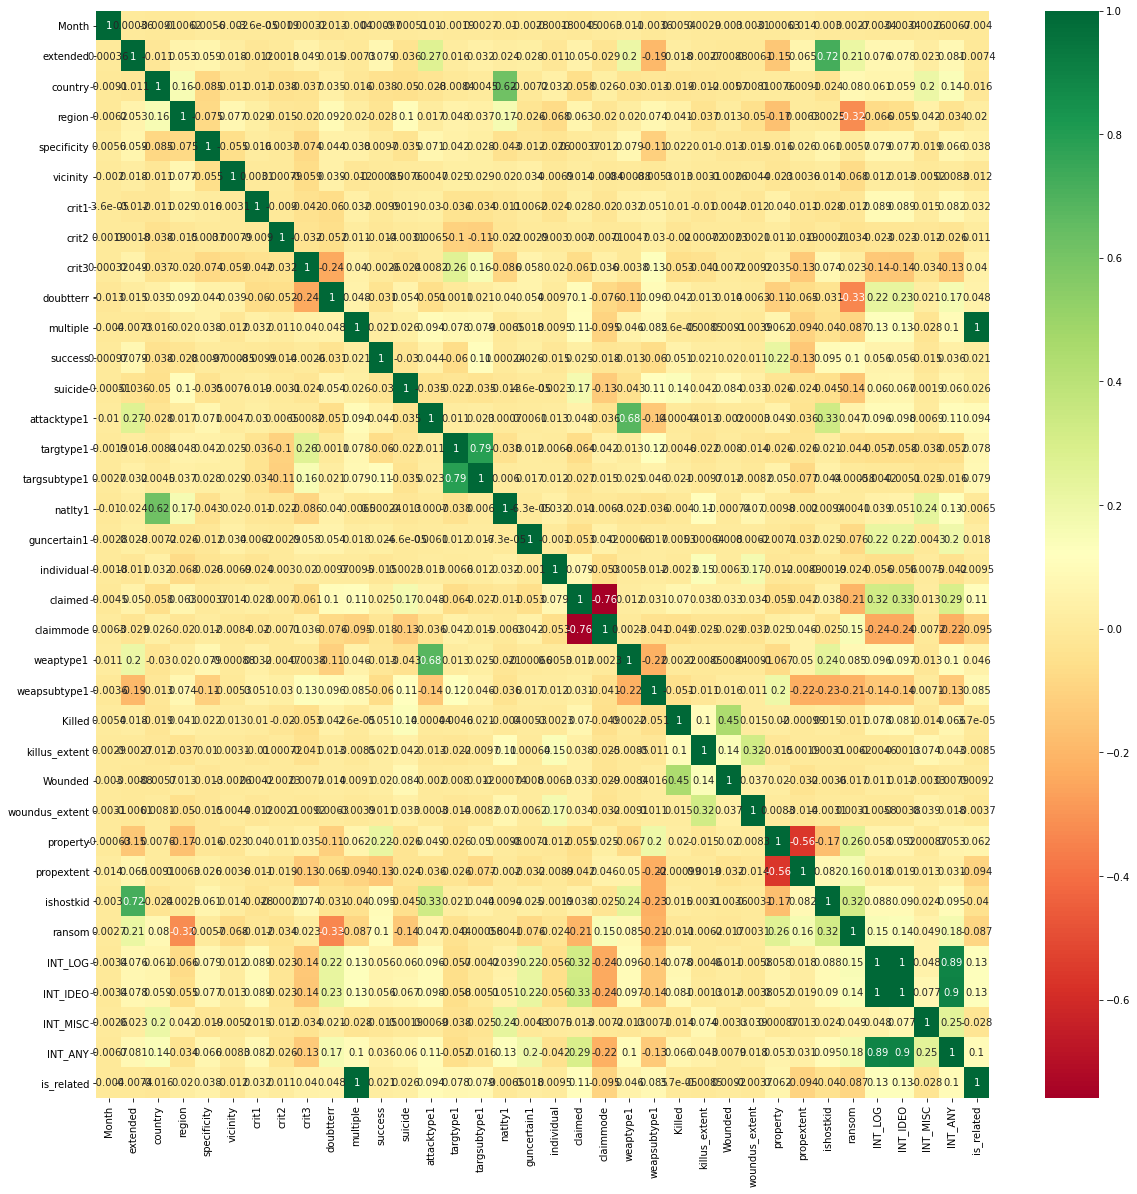

In [25]:
#get correlations of each features in dataset
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
hm = sns.heatmap(corrmat,
                 cbar=True, annot=True, cmap="RdYlGn")

That's nice! We still have more to go! Our purpose now is to delete columns, using threshold of **|0.65|**. Therefore, we need to delete **claimmode**, **INT_LOG**, **INT_IDEO**, **INT_MISC** (it is described in **INT_ANY**), **extended**, **weaptype1**, **targsubtype1**. Pretty interesting that we shouldn't create column **is_related** because it is perfectly described in **multiple**. Let's delete it as well.

In [26]:
data2 = data2.drop(columns=['claimmode', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'extended', 'weaptype1',
                            'targsubtype1', 'multiple'])

data2.shape

(201182, 30)

Finally, we need to replace text in **provstate** and **Group** to numbers and replace unknown data (-9 and -99) to 0s in our dataset.

In [27]:
#replacing provstate and Group to numbers
data2.provstate = pd.Categorical(data2.provstate)
data2['provstate_code'] = data2.provstate.cat.codes
data2.Group = pd.Categorical(data2.Group)
data2['Group_code'] = data2.Group.cat.codes

data2 = data2.replace(-9,0)
data2 = data2.replace(-99,0)

data2.head()

Month  country  region provstate  specificity  vicinity  crit1  crit2  \
0      7       58       2  National          1.0         0      1      1   
1      0      130       1   Federal          1.0         0      1      1   
2      1      160       5    Tarlac          4.0         0      1      1   
3      1       78       8    Attica          1.0         0      1      1   
4      1      101       4   Fukouka          1.0         0      1      1   

   crit3  doubtterr  success  suicide  attacktype1  targtype1  natlty1  \
0      1          0        1        0            1         14     58.0   
1      1          0        1        0            6          7     21.0   
2      1          0        1        0            1         10    217.0   
3      1          0        1        0            3          7    217.0   
4      1          0        1        0            7          7    217.0   

                                Group  guncertain1  individual  claimed  \
0                              MANO-D          0.0           0      0.0   
1  23rd of September Communist League          0.0           0      0.0   
2                             Unknown          0.0           0      0.0   
3                             Unknown          0.0           0      0.0   
4                             Unknown          0.0           0      0.0   

   weapsubtype1  Killed  killus_extent  Wounded  woundus_extent  property  \
0           0.0       1            0.0        0             0.0         0   
1           0.0       0            0.0        0             0.0         0   
2           0.0       1            0.0        0             0.0         0   
3          16.0       0            0.0        0             0.0         1   
4           0.0       0            0.0        0             0.0         1   

   propextent  ishostkid  ransom  INT_ANY  is_related  provstate_code  \
0         4.0        0.0     0.0        0         0.0            1583   
1         4.0        1.0     1.0        1         0.0             707   
2         4.0        0.0     0.0        1         0.0            2291   
3         4.0        0.0     0.0        1         0.0             159   
4         4.0        0.0     0.0        1         0.0             732   

   Group_code  
0        1969  
1          13  
2        3538  
3        3538  
4        3538

## Dealing With Imbalanced Data

Alright, we finished with deleting columns. It would be interesting to take a look at distribution of our **success** variable. Remember: it has some disproportions. 

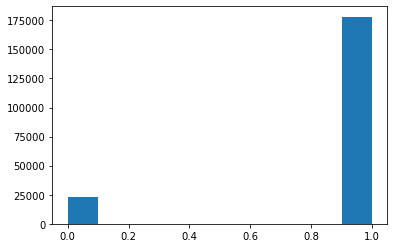

In [28]:
plt.hist(data2['success'])
plt.show()

Wow! This means, while modelling we have to pay attention not only to accuracy, but also to precision, recall and F-score. So, how can we deal with imbalanced data? 

There are 3 ways:

**1.** *Using Tree-Based algorithms*. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed. Moreover, it was confirmed empirically.

**2.** *Undersampling majority class*.

**3.** *Downsampling minority class*.

Because we have a lot of data, we can drop 25% of majority-class rows.

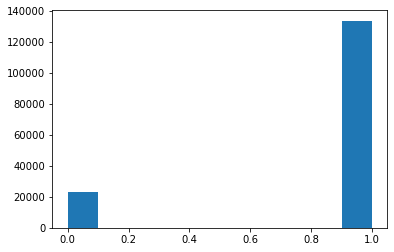

In [29]:
data3 = data2.drop(data2[data2['success'] == 1].sample(frac = 0.25).index)

plt.hist(data3['success'])
plt.show()

In [30]:
success_probability_1 = data3[data3['success'] == 1]['success'].count()/data3['success'].count()
print(data3.shape)
print(f'Overall probability of success = {round(success_probability_1,3)}')

(156663, 32)
Overall probability of success = 0.853


After that we can use Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

But before, it is important to split our dataset to training and testing sets. Then - normalize.

In [31]:
y = data3['success']
X = data3.drop(columns=['success', 'provstate', 'Group'])

X.head(2)

Month  country  region  specificity  vicinity  crit1  crit2  crit3  \
0      7       58       2          1.0         0      1      1      1   
1      0      130       1          1.0         0      1      1      1   

   doubtterr  suicide  attacktype1  targtype1  natlty1  guncertain1  \
0          0        0            1         14     58.0          0.0   
1          0        0            6          7     21.0          0.0   

   individual  claimed  weapsubtype1  Killed  killus_extent  Wounded  \
0           0      0.0           0.0       1            0.0        0   
1           0      0.0           0.0       0            0.0        0   

   woundus_extent  property  propextent  ishostkid  ransom  INT_ANY  \
0             0.0         0         4.0        0.0     0.0        0   
1             0.0         0         4.0        1.0     1.0        1   

   is_related  provstate_code  Group_code  
0         0.0            1583        1969  
1         0.0             707          13

In [32]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X_std, y,random_state=0, test_size = .2)

Let's generate the new samples in the training set. Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0, k_neighbors=45, n_jobs=-1)
X_train, y_train = sm.fit_resample(X_train, y_train)

## Predicting

Now, we want to select models with best parameters. Our metrics includes balanced accuracy, which is the arithmetic mean of the recall and specificity.

In [45]:
vanilla_models = { 
    
    # Linear Models
    'Logistic Regression' : LogisticRegression(n_jobs = -1, random_state = 56),
    'SGD Classifier' : SGDClassifier(n_jobs = -1, random_state= 56),
    
    # Support Vector Machine
    'Linear SVC' : LinearSVC(random_state = 56, dual = False),
    
    # Naive Bayes:
    'Gaussian Naive-Bayes' : GaussianNB(),
    
    # Decision Tree & Ensemble
    'Decision Tree Classifier' : DecisionTreeClassifier(random_state= 56),
    'Random Forest Classifier': RandomForestClassifier(n_jobs = -1, random_state= 56),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(random_state= 56),
    'AdA Boost Classifier': AdaBoostClassifier(random_state = 56),
    'Bagging Classifier' : BaggingClassifier(random_state= 56, n_jobs = -1), 
    'LGBM Classifier' : lightgbm.LGBMClassifier(random_state= 123, n_jobs = -1)
    
}

In [46]:
score_table = pd.DataFrame(columns = ['model', 'cv_10'])


for model, n in zip(vanilla_models, np.arange(len(vanilla_models))):
                    
    clf = Pipeline([
          ('classification', vanilla_models[model]),
        ])
    
    clf.fit(X_train, y_train)
    
    cv_10 = cross_val_score(clf, X_test, y_test, cv = 10, scoring = 'balanced_accuracy').mean()
    
    score_table.loc[n,'model'] = model
    score_table.loc[n,'cv_10'] = cv_10

[LightGBM] [Info] Number of positive: 106920, number of negative: 18410
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 125330, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.853108 -> initscore=1.759187
[LightGBM] [Info] Start training from score 1.759187
[LightGBM] [Info] Number of positive: 23972, number of negative: 4227
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1106
[LightGBM] [Info] Number of data points in the train set: 28199, number of used features: 29
[LightGBM] [I

In [47]:
score_table.sort_values(by = 'cv_10', ascending = False)

model     cv_10
8            Bagging Classifier  0.833979
9               LGBM Classifier  0.832353
5      Random Forest Classifier  0.825267
6  Gradient Boosting Classifier  0.820564
4      Decision Tree Classifier  0.805563
7          AdA Boost Classifier  0.686454
3          Gaussian Naive-Bayes  0.631249
0           Logistic Regression  0.539202
2                    Linear SVC  0.513496
1                SGD Classifier  0.503248

Our top performers in balanced accuracy are Bagging Classifier, LGBM and Random Forest. We are going to test them, but first, let's try logistic regression. Yes, it is definitely not the best choice, but our purpose is demonstrating why we should not use these algorithms for imbalanced dataset.

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

train_accuracy = []
test_accuracy = []
# this cycle is needed for cross validation
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=123)
    logreg.fit(X_train, y_train)
    y1_train = logreg.predict(X_train)
    y1_test =  logreg.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y1_train))
    test_accuracy.append(accuracy_score(y_test, y1_test))

print('Mean train accuracy score: ', np.mean(train_accuracy))
print('Mean test accuracy score: ', np.mean(test_accuracy))
# create confusion matrix
print(metrics.classification_report(y_test, y1_test))  

Mean train accuracy score:  0.8602649006622517
Mean test accuracy score:  0.8579772125235376
              precision    recall  f1-score   support

           0       0.74      0.08      0.15      4697
           1       0.86      1.00      0.92     26636

    accuracy                           0.86     31333
   macro avg       0.80      0.54      0.53     31333
weighted avg       0.84      0.86      0.81     31333



Well, this algorithm outperform our naive assumption only with a difference of 0.008. This is not the best result we can achieve even with SMOTE. Also, we have pretty low F1-score and really low recall for unsuccessful attacks. Let's try another algorithms. Probably, *random forest* will be better.

In [35]:
# define the model 
clf = RandomForestClassifier(
    n_estimators=300, # The number of trees in the forest.
    criterion='gini', #  function to measure the quality of a split (Gini impurity and “entropy”)
    max_depth=20, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features='auto', # The number of features to consider when looking for the best split.
    max_leaf_nodes=None,
    min_impurity_decrease=0.0, # Threshold for early stopping in tree growth. 
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,  # The number of jobs to run in parallel. -1 means using all processors.
    random_state=0, # 
    verbose=0,
    warm_start=False,
    class_weight='balanced')

# run model
clf.fit(X_train, y_train)

# getting prediction
predicted = clf.predict(X_test)

# getting quolity of model
print(metrics.classification_report(y_test, predicted))
# create confusion matrix
print(metrics.confusion_matrix(y_test, predicted))  
#Accuracy
print('Test accuracy score: ',metrics.accuracy_score(y_test, predicted))  

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4697
           1       0.96      0.96      0.96     26636

    accuracy                           0.93     31333
   macro avg       0.86      0.87      0.87     31333
weighted avg       0.93      0.93      0.93     31333

[[ 3664  1033]
 [ 1140 25496]]
Test accuracy score:  0.9306481983850892


This is much better! However, let's try using ensemble from tree-based algorithms, using lightGBM classifier.

In [49]:
from statistics import mean

lgbmc = lightgbm.LGBMClassifier(random_state= 123, n_jobs = -1)
lgbmc.fit(X_train, y_train)
predicted_lgbmc = lgbmc.predict(X_test)
print(metrics.classification_report(y_test, predicted_lgbmc))
print('Test accuracy score: ',metrics.accuracy_score(y_test, predicted_lgbmc))  

              precision    recall  f1-score   support

           0       0.81      0.71      0.75      4697
           1       0.95      0.97      0.96     26636

    accuracy                           0.93     31333
   macro avg       0.88      0.84      0.86     31333
weighted avg       0.93      0.93      0.93     31333

Test accuracy score:  0.9307120288513707


This algorithm has higher precision for zeros, but lower recall. Accuracy is almost the same.

Let's try the last one: Bagging Classifier.

In [50]:
bagclass = BaggingClassifier(random_state= 56, n_jobs = -1)

bagclass.fit(X_train, y_train)

predicted_bagclass = bagclass.predict(X_test)

print(metrics.classification_report(y_test, predicted_bagclass))
print('Test accuracy score: ',metrics.accuracy_score(y_test, predicted_bagclass))  

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      4697
           1       0.95      0.96      0.96     26636

    accuracy                           0.93     31333
   macro avg       0.87      0.85      0.86     31333
weighted avg       0.93      0.93      0.93     31333

Test accuracy score:  0.9292758433600358


It is doing slightly worse than previous algorithms in accuracy, but has slightly higher f-1 score for unsuccessful attacks.

OK, now it's time for something more exciting. 

**Algorithms of the world, unite!**

<img src="https://thebulwark.com/app/uploads/2019/07/workersunite.jpg" style="width: 500px;" align="center"/>  
<br>
<br>

In following code we create Voting Classifier for these three algorithms + Gradient Boosting. 

**Meet New Avengers!**

In [52]:
from sklearn.ensemble import VotingClassifier

estimators = []

estimators.append(('rf', clf))
estimators.append(('lgbm', lgbmc))
estimators.append(('bagging', bagclass))

GB = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.01, max_depth = 20, random_state = 56)
estimators.append(('GB', GB))

ensemble = VotingClassifier(estimators, voting = 'soft', n_jobs = -1)
ensemble.fit(X_train, y_train)

predicted_ensemble = ensemble.predict(X_test)

print(metrics.classification_report(y_test, predicted_ensemble))
print('Test accuracy score: ',metrics.accuracy_score(y_test, predicted_ensemble))

[LightGBM] [Info] Number of positive: 106920, number of negative: 18410
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1297
[LightGBM] [Info] Number of data points in the train set: 125330, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.853108 -> initscore=1.759187
[LightGBM] [Info] Start training from score 1.759187
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      4697
           1       0.95      0.98      0.96     26636

    accuracy                           0.94     31333
   macro avg       0.89      0.84      0.87     31333
weighted avg       0.93      0.94      0.93     31333

Test accuracy score:  0.9358184661538953


This thing is definitely better than the previous algorithms, although it has lower recall for unsuccessful attacks.

# Conclusion

Depending on who are you - terrorist or counterterrorist - we can suggest you the following best algorithms:

**For Terrorists** - use *Random Forest* because it has the highest recall for unsuccessful attacks. The reason is that terrorists are better off predicting unsuccessful attacks and stop attack if it has potential to be unsuccessful than not to do anything when there is actual unsuccessful attack.

**For CounterTerrorists** - our *Voting Classifier* definitely works best due to the highest recall of successful attacks and the lowest for unsuccessful ones. Of course, we could propose some other algorithms, which has the highest accuracy, but with the lowest f-score for unsuccessful attacks. Nevertheless, we should consider that our dataset may be biased because there are more reports of successful attacks, rather than unsuccessful. That's why accuracy in predicting unsuccessful attacks in crucial too.